## Explicación teórica

### ¿Qué es la notación Big O?

La notación Big O describe el comportamiento asintótico de un algoritmo, es decir, cómo crece su tiempo de ejecución o uso de memoria al aumentar el tamaño de entrada "n". Se usa para clasificar algoritmos según su eficiencia.

**Principales órdenes de complejidad:**

- O(1): constante  
- O(log n): logarítmica  
- O(n): lineal  
- O(n log n): lineal-logarítmica  
- O(n²): cuadrática
- O(2^n^: exponensial)

## Justificación de los algoritmos elegidos

Se eligieron **búsqueda lineal** y **búsqueda binaria** porque:

- Son fáciles de implementar y entender.
- Representan dos clases diferentes de complejidad:  
  - Lineal: O(n)  
  - Logarítmica: O(log n)
- Permiten demostrar cómo cambia el rendimiento con el tamaño de los datos y el tipo de caso (mejor, promedio, peor).

In [12]:
# Importar las librerías necesarias
import timeit
import random
import matplotlib.pyplot as plt

def busqueda_lineal(lista, objetivo):
    """
    Realiza búsqueda lineal.
    Recorre la lista secuencialmente y retorna el índice del objetivo si lo encuentra.
    Retorna -1 si no está en la lista.
    Complejidad: O(n)
    """
    for i, elemento in enumerate(lista):
        if elemento == objetivo:
            return i
    return -1

def busqueda_binaria(lista, objetivo):
    """
    Realiza búsqueda binaria en una lista ordenada.
    Retorna el índice si encuentra el objetivo, o -1 en caso contrario.
    Complejidad: O(log n)
    """
    izquierda, derecha = 0, len(lista) - 1
    while izquierda <= derecha:
        medio = (izquierda + derecha) // 2
        if lista[medio] == objetivo:
            return medio
        elif lista[medio] < objetivo:
            izquierda = medio + 1
        else:
            derecha = medio - 1
    return -1

## Casos evaluados

Se crearon 3 listas, cada una con un tamaño de lista diferente (10.000, 100.000, 1.000.000), y se midieron los siguientes escenarios para ambos algoritmos:

- **Mejor caso:**  
  - Lineal: objetivo en la primera posición.  
  - Binaria: objetivo en la posición media. 

- **Caso Promedio:**
  - Objetivo en una posición aleatoria de la lista.  

- **Peores casos:**  
  - Lineal: objetivo en la última posición o no existe en la lista.  
  - Binaria: objetivo no existe o está en extremos.

Se decidió que, a pesar de que ejemplificar poniendo solo un caso en cada busqueda se representa de buena forma, utilizar los 3 casos (mejor, promedio y peor) podria ilustrar aún de mejor manera el como se comportan ambas busquedas con cada una de las listas.

Resultados de tiempos de búsqueda (en segundos):

Tamaño de lista: 10000
  Lineal mejor: 0.000001 s
  Lineal promedio: 0.000178 s
  Lineal peor ubicacion: 0.000411 s
  Lineal peor no existe: 0.000672 s
  Binaria mejor: 0.000004 s
  Binaria promedio: 0.000003 s
  Binaria peor ubicacion: 0.000002 s
  Binaria peor no existe: 0.000003 s
----------------------------------------
Tamaño de lista: 100000
  Lineal mejor: 0.000000 s
  Lineal promedio: 0.003735 s
  Lineal peor ubicacion: 0.003334 s
  Lineal peor no existe: 0.003276 s
  Binaria mejor: 0.000002 s
  Binaria promedio: 0.000002 s
  Binaria peor ubicacion: 0.000002 s
  Binaria peor no existe: 0.000002 s
----------------------------------------
Tamaño de lista: 1000000
  Lineal mejor: 0.000000 s
  Lineal promedio: 0.027932 s
  Lineal peor ubicacion: 0.036499 s
  Lineal peor no existe: 0.033001 s
  Binaria mejor: 0.000002 s
  Binaria promedio: 0.000002 s
  Binaria peor ubicacion: 0.000002 s
  Binaria peor no existe: 0.000002 s
----------

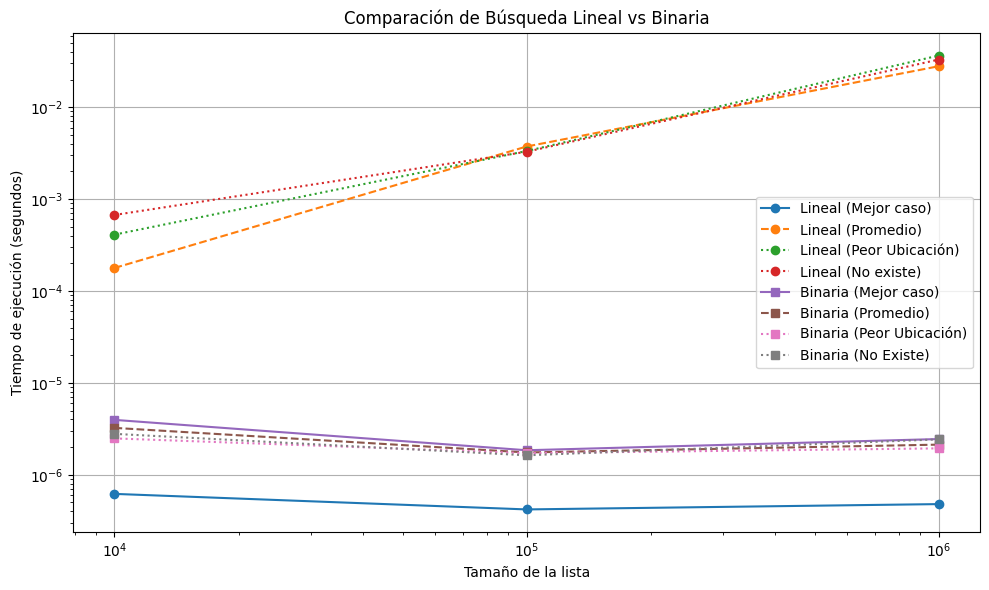

In [ ]:
def medir_tiempos_busqueda(tamaños):
    """
    Mide los tiempos de ejecución de los algoritmos de búsqueda para diferentes escenarios.
    """
    # Diccionario para almacenar los resultados usando como clave el tipo de búsqueda y el escenario
    resultados = {
        "lineal_mejor": [], "lineal_promedio": [], "lineal_peor_ubicacion": [], "lineal_peor_no_existe": [],
        "binaria_mejor": [], "binaria_promedio": [], "binaria_peor_ubicacion": [], "binaria_peor_no_existe": []
    }

    # Iterar sobre los tamaños de lista especificados
    for n in tamaños:
        lista = list(range(n))
        objetivo_lineal_mejor = lista[0]
        objetivo_binaria_mejor = lista[n // 2]
        # Todos los demas sirven para ambos casos
        objetivo_promedio = random.choice(lista)
        objetivo_peor_ubicacion = lista[-1]
        objetivo_no_existe = -1
        repeticiones = 10

        # Búsqueda lineal para cada escenario
        resultados["lineal_mejor"].append(timeit.timeit(
            lambda: busqueda_lineal(lista, objetivo_lineal_mejor), number=repeticiones)/repeticiones)
        resultados["lineal_promedio"].append(timeit.timeit(
            lambda: busqueda_lineal(lista, objetivo_promedio), number=repeticiones)/repeticiones)
        resultados["lineal_peor_ubicacion"].append(timeit.timeit(
            lambda: busqueda_lineal(lista, objetivo_peor_ubicacion), number=repeticiones)/repeticiones)
        resultados["lineal_peor_no_existe"].append(timeit.timeit(
            lambda: busqueda_lineal(lista, objetivo_no_existe), number=repeticiones)/repeticiones)

        # Búsqueda binaria para cada escenario
        resultados["binaria_mejor"].append(timeit.timeit(
            lambda: busqueda_binaria(lista, objetivo_binaria_mejor), number=repeticiones)/repeticiones)
        resultados["binaria_promedio"].append(timeit.timeit(
            lambda: busqueda_binaria(lista, objetivo_promedio), number=repeticiones)/repeticiones)
        resultados["binaria_peor_ubicacion"].append(timeit.timeit(
            lambda: busqueda_binaria(lista, objetivo_peor_ubicacion), number=repeticiones)/repeticiones)
        resultados["binaria_peor_no_existe"].append(timeit.timeit(
            lambda: busqueda_binaria(lista, objetivo_no_existe), number=repeticiones)/repeticiones)

    # Devuelve los resultados como un diccionario
    return resultados


# Función para graficar los resultados
def graficar_resultados(tamaños, resultados):
    """
    Grafica los resultados de tiempo de ejecución para cada tipo de búsqueda.
    """
    plt.figure(figsize=(10, 6))

    # Búsqueda Lineal
    plt.plot(tamaños, resultados["lineal_mejor"], marker='o', label="Lineal (Mejor caso)")
    plt.plot(tamaños, resultados["lineal_promedio"], marker='o', linestyle='--', label="Lineal (Promedio)")
    plt.plot(tamaños, resultados["lineal_peor_ubicacion"], marker='o', linestyle=':', label="Lineal (Peor Ubicación)")
    plt.plot(tamaños, resultados["lineal_peor_no_existe"], marker='o', linestyle=':', label="Lineal (No existe)")

    # Búsqueda Binaria
    plt.plot(tamaños, resultados["binaria_mejor"], marker='s', label="Binaria (Mejor caso)")
    plt.plot(tamaños, resultados["binaria_promedio"], marker='s', linestyle='--', label="Binaria (Promedio)")
    plt.plot(tamaños, resultados["binaria_peor_ubicacion"], marker='s', linestyle=':', label="Binaria (Peor Ubicación)")
    plt.plot(tamaños, resultados["binaria_peor_no_existe"], marker='s', linestyle=':', label="Binaria (No Existe)")

    # Configuración del gráfico 
    plt.xlabel("Tamaño de la lista")
    plt.ylabel("Tiempo de ejecución (segundos)")
    plt.title("Comparación de Búsqueda Lineal vs Binaria")
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    plt.tight_layout()
    plt.savefig("comparacion_busquedas.png")
    plt.show()


# Función para imprimir los resultados de búsqueda
def imprimir_resultados(tamaños, resultados):
    """
    Imprime los tiempos de ejecución por tipo de búsqueda, tamaño de la lista y escenario.
    """
    print("Resultados de tiempos de búsqueda (en segundos):\n")
    # Mostrar los resultados de búsqueda para cada tamaño de lista
    for i, n in enumerate(tamaños):
        print(f"Tamaño de lista: {n}")
        for clave in resultados:
            tiempo = resultados[clave][i]
            print(f"  {clave.replace('_', ' ').capitalize()}: {tiempo:.6f} s")
        print("-" * 40)


# Generar el gráfico comparativo entre búsqueda lineal y binaria para diferentes tamaños de lista
tamaños = [10_000, 100_000, 1_000_000]
resultados = medir_tiempos_busqueda(tamaños)

# Mostrar los resultados de ambas busquedas para cada escenario
imprimir_resultados(tamaños, resultados)

# Graficar los resultados de ambas busquedas para cada escenario
graficar_resultados(tamaños, resultados)

## Interpretación de los resultados

- La búsqueda lineal presenta una gran variabilidad en su rendimiento, ya que depende directamente de la posición del objetivo en la lista. Si el objetivo está al inicio, el tiempo es mínimo; si está al final o no existe, el tiempo de búsqueda es máximo.
- La búsqueda binaria ofrece un rendimiento estable y eficiente en todos los casos, ya que reduce el espacio de búsqueda dividiendo el rango a la mitad en cada paso. Esto limita el número de comparaciones incluso en listas muy extensas.
- A medida que el tamaño de la lista crece, la diferencia de rendimiento entre ambos algoritmos se vuelve significativa. En listas ordenadas, la búsqueda binaria es claramente superior debido a su complejidad logarítmica.
- En resumen, aunque la búsqueda lineal es simple y útil en listas pequeñas o no ordenadas, la búsqueda binaria es mucho más eficiente en listas grandes y ordenadas, mostrando tiempos de respuesta considerablemente menores en todos los casos evaluados.